# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [1]:
!pip install networkx==2.3

In [2]:
!pip install stellargraph

In [3]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [4]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [5]:
len(data)

9650

In [6]:
data.values.tolist()[:5]

[['m1', 'a1'], ['m2', 'a1'], ['m2', 'a2'], ['m3', 'a1'], ['m3', 'a3']]

In [7]:
edges = [tuple(x) for x in data.values.tolist()]

In [8]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [9]:
A = list(nx.connected_component_subgraphs(B))[0]

In [10]:
A

In [11]:
list(nx.connected_component_subgraphs(B))[0]

In [12]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


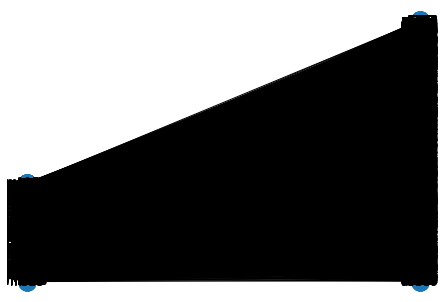

In [13]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [14]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [15]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [16]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [17]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [18]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

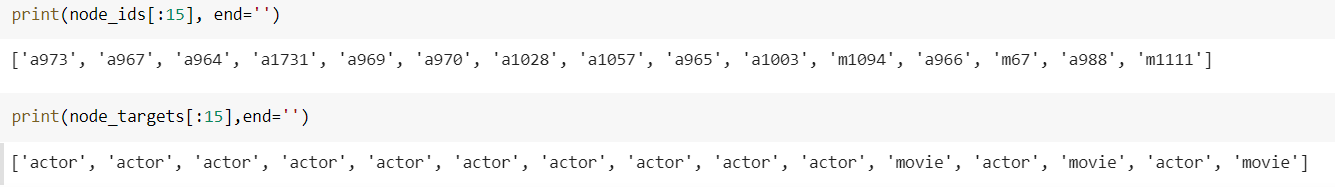

In [19]:
node_embeddings[:10]

array([[-2.3096197 ,  1.4202939 , -1.3059871 , ..., -1.0428957 ,
         0.14832635, -1.0530851 ],
       [-1.4850763 ,  0.42532986, -0.7693434 , ..., -1.3436102 ,
         0.7418003 , -0.4161651 ],
       [ 1.2224945 ,  1.0988613 ,  0.25120473, ..., -0.86744505,
         1.6465839 ,  1.3121972 ],
       ...,
       [-1.6546379 ,  1.9013535 ,  3.0470285 , ...,  1.0641118 ,
         1.5468329 , -2.399592  ],
       [ 1.0469139 ,  2.4420593 , -0.6494191 , ...,  2.338668  ,
         3.3468666 ,  0.45089716],
       [-1.871989  ,  0.71408933, -1.227558  , ..., -0.2147621 ,
         0.5634736 , -0.02104896]], dtype=float32)

In [20]:
len(node_ids), len(node_targets), len(node_embeddings)

(4703, 4703, 4703)

In [21]:
node_ids[5], node_targets[5], node_embeddings[5]

('a970',
 'actor',
 array([-1.5725865 ,  0.03658107, -0.7970345 ,  0.08676033, -0.2815841 ,
         0.93020064, -1.4457265 ,  1.63103   ,  0.13858122, -1.6204854 ,
         0.6990445 ,  0.3968009 , -1.231417  , -0.04774383, -0.06956051,
        -0.31433883,  0.59390527, -0.06323108, -2.1532905 , -1.1720998 ,
        -2.2085907 , -0.6238491 , -0.22694066, -0.596925  ,  1.0623507 ,
         0.22474194, -0.88786477, -0.39263535,  1.6017164 ,  0.59724617,
        -2.0429506 , -2.6349778 ,  0.08489145, -0.7981158 ,  0.8312825 ,
         0.6984066 ,  0.3714528 , -0.12314478,  0.37042034,  1.1690298 ,
         0.6403906 , -1.7281272 ,  0.39399788, -0.30784136, -1.0098649 ,
        -0.8520263 ,  0.28040937, -0.5962035 ,  0.37742874,  0.9114598 ,
         0.6532941 ,  0.57217187,  0.06840012,  0.24353585,  0.06693898,
        -0.19059832,  1.4579582 , -1.4905374 , -2.1889665 ,  0.913337  ,
        -1.4801203 ,  0.19537248,  0.37669757, -0.28188047, -1.4401081 ,
        -1.1225641 ,  0.21901692

In [22]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]

    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    for i in range(len(node_ids)):
      if node_targets[i]=='actor':
        actor_nodes.append(node_ids[i])
        actor_embeddings.append(node_embeddings[i])

      if node_targets[i]=='movie':
        movie_nodes.append(node_ids[i])
        movie_embeddings.append(node_embeddings[i])

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [23]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)

In [24]:
len(actor_nodes)

3411

<font color='cyan'>Grader function - 1</font>

In [25]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [26]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [27]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    # cost1=0 # calculate cost1 
    cost1=len(max(nx.connected_components(graph), key=len))/graph.number_of_nodes()
    cost1=cost1/number_of_clusters
    
    return cost1

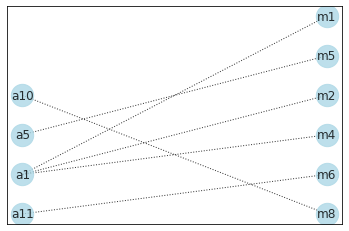

In [28]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

In [29]:
max(nx.connected_components(graded_graph), key=len)

{'a1', 'm1', 'm2', 'm4'}

In [30]:
len(max(nx.connected_components(graded_graph), key=len))

4

<font color='cyan'>Grader function - 3</font>

In [31]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [32]:
list(graded_graph.degree)

[('a1', 3),
 ('a5', 1),
 ('a10', 1),
 ('a11', 1),
 ('m1', 1),
 ('m2', 1),
 ('m4', 1),
 ('m6', 1),
 ('m5', 1),
 ('m8', 1)]

In [33]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    # cost2=0 # calculate cost1  
    lst = list(graph.degree)
    count = 0
    for i in range(len(lst)):
      if 'm' in lst[i][0]:
        count+=1
    degree = graph.number_of_edges()
    cost2 = degree/count
    cost2=cost2/number_of_clusters
    
    return cost2

<font color='cyan'>Grader function - 4</font>

In [34]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [35]:
clusters = [3, 5, 10, 30, 50, 100, 200, 500]
final_cost = []
for num_of_clusters in clusters:
  algo = KMeans(n_clusters=num_of_clusters)
  algo.fit(actor_embeddings)
  labels = algo.labels_
  centers = algo.cluster_centers_

  final_cost1 = 0
  final_cost2 = 0
  for i in centers:
    sim_point = model.similar_by_vector(i,topn=1,restrict_vocab=None) #source: Stackoverflow (Taking closer point to center)
    final_cost1 += cost1(nx.ego_graph(A,sim_point[0][0]),num_of_clusters)
    final_cost2 += cost2(nx.ego_graph(A,sim_point[0][0]),num_of_clusters)
  final_cost.append(final_cost1*final_cost2)
  print('cost for '+str(num_of_clusters)+' clusters is :'+str(final_cost1*final_cost2))

cost for 3 clusters is :1.0
cost for 5 clusters is :1.0
cost for 10 clusters is :1.7
cost for 30 clusters is :1.9000000000000004
cost for 50 clusters is :2.0000000000000013
cost for 100 clusters is :1.4100000000000017
cost for 200 clusters is :1.214999999999998
cost for 500 clusters is :1.1280000000000014


In [36]:
print('Clusters that have max cost ', clusters[final_cost.index(max(final_cost))])

Clusters that have max cost  50


<font color='blue'>Displaying similar actor clusters</font>

In [37]:
actor_nodes[5]

'a970'

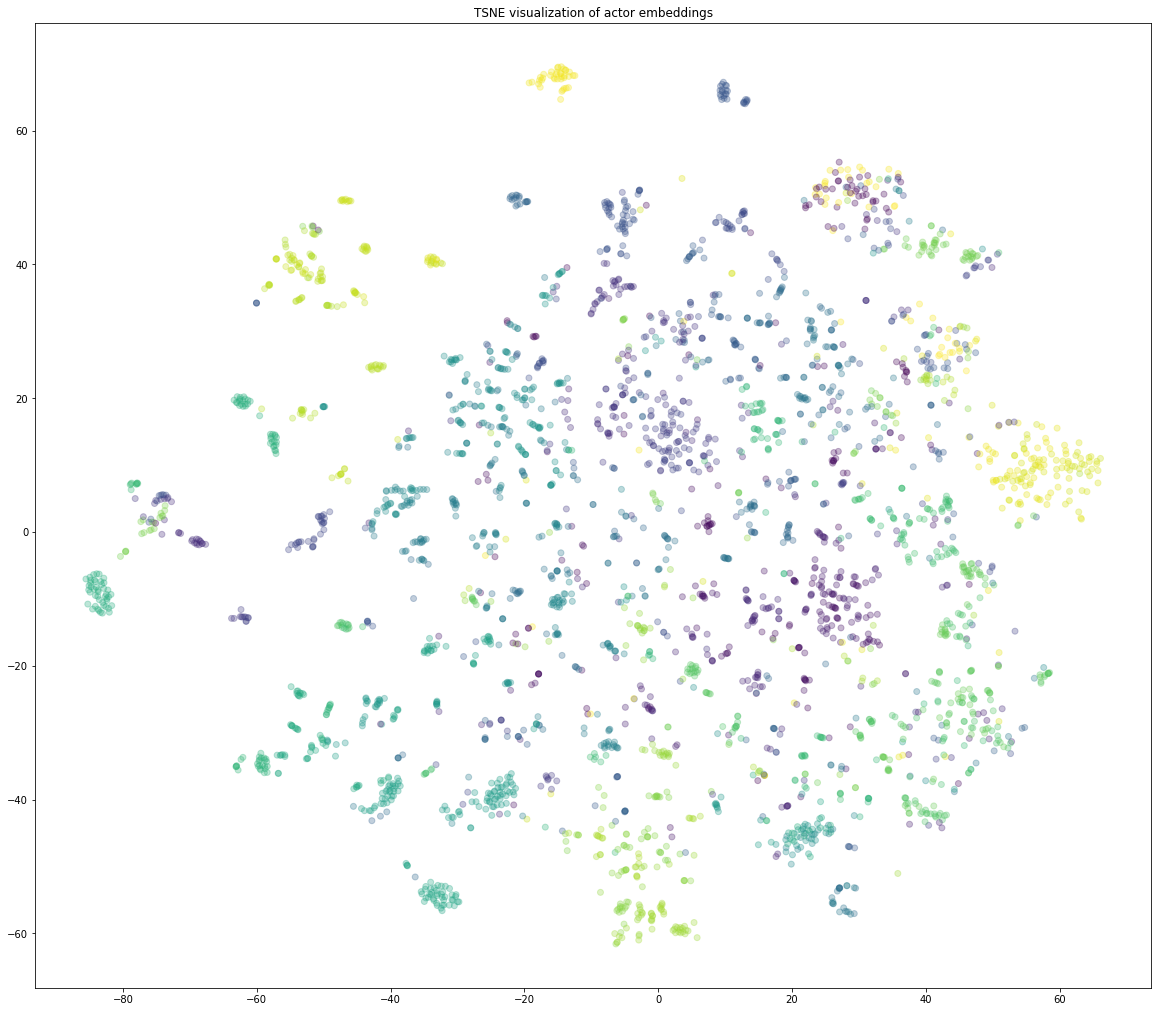

In [38]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
actor_tsne = trans.fit_transform(actor_embeddings)

import numpy as np
# draw the points

# for node in actor_nodes:


label_map = {l: i for i, l in enumerate(np.unique(actor_nodes))}
node_colours = [label_map[target] for target in actor_nodes]

plt.figure(figsize=(20,20))
plt.axes().set(aspect="equal")
plt.scatter(actor_tsne[:,0], 
            actor_tsne[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of actor embeddings'.format(transform.__name__))

plt.show()

<font color='blue'>Grouping similar movies</font>

In [39]:
clusters = [3, 5, 10, 30, 50, 100, 200, 500]
final_cost = []
for num_of_clusters in clusters:
  algo = KMeans(n_clusters=num_of_clusters)
  algo.fit(movie_embeddings)
  labels = algo.labels_
  centers = algo.cluster_centers_

  final_cost1 = 0
  final_cost2 = 0
  for i in centers:
    sim_point = model.similar_by_vector(i,topn=1,restrict_vocab=None) #source: Stackoverflow (Taking closer point to center)
    final_cost1 += cost1(nx.ego_graph(A,sim_point[0][0]),num_of_clusters)
    final_cost2 += cost2(nx.ego_graph(A,sim_point[0][0]),num_of_clusters)
  final_cost.append(final_cost1*final_cost2)
  print('cost for '+str(num_of_clusters)+' clusters is :'+str(final_cost1*final_cost2))

cost for 3 clusters is :1.0
cost for 5 clusters is :2.0
cost for 10 clusters is :1.9000000000000001
cost for 30 clusters is :7.8
cost for 50 clusters is :10.499999999999998
cost for 100 clusters is :11.129999999999999
cost for 200 clusters is :11.30000000000001
cost for 500 clusters is :10.335999999999977


In [40]:
print('Clusters that have max cost :', clusters[final_cost.index(max(final_cost))])

Clusters that have max cost : 200


<font color='blue'>Displaying similar movie clusters</font>

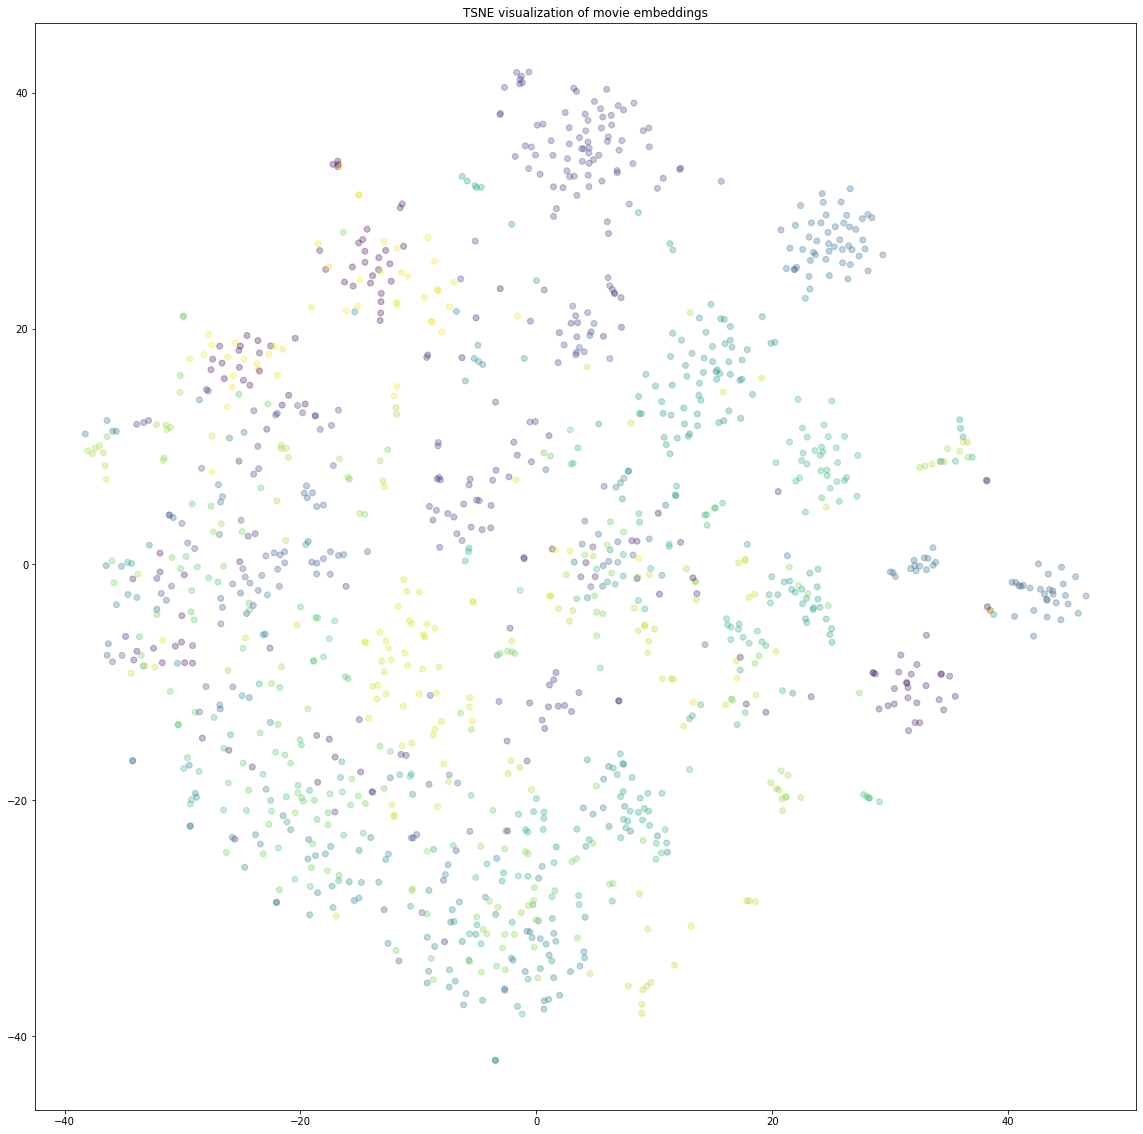

In [41]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
movie_tsne = trans.fit_transform(movie_embeddings)

import numpy as np
# draw the points


label_map = {l: i for i, l in enumerate(np.unique(movie_nodes))}
node_colours = [label_map[target] for target in movie_nodes]

plt.figure(figsize=(20,20))
plt.axes().set(aspect="equal")
plt.scatter(movie_tsne[:,0], 
            movie_tsne[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of movie embeddings'.format(transform.__name__))

plt.show()